# Explore the Surface Precipitation Data of VVM Simulations

Before we proceed to apply Single Image [Super Resolution](https://en.wikipedia.org/wiki/Super-resolution_imaging) (SISR) on model output, let's first explore the dataset a little bit, to understand the characterisitcs of the dataset and possible preprocessing procedures required.

## VVM output

We have 2085 cases of VVM surface precipitation stored as `YYYYmmddHHMM.npy`. Let's first explore the general characteristics.

In [1]:
# Set up parameters
DIRORI = 'D:\\data\\vvm_sprec\\original\\'
DIR2nd = 'D:\\data\\vvm_sprec\\scale_0.5\\'
DIR4th = 'D:\\data\\vvm_sprec\\scale_0.25\\'
DIR8th = 'D:\\data\\vvm_sprec\\scale_0.125\\'

import numpy as np
import logging, os

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
# Scan for data
def loadIOTab(srcx, srcy, dropna=False):
    import pandas as pd
    # Scan for input data
    logging.info("Reading input X from: "+ srcx)
    xfiles = []
    for root, dirs, files in os.walk(srcx): 
        for fn in files: 
            if fn.endswith('.npy'): 
                 xfiles.append({'date':fn.replace('.npy',''), 'xuri':os.path.join(root, fn)})
    xfiles = pd.DataFrame(xfiles)
    logging.info("... read input size: "+str(xfiles.shape))
    # Scan for input data
    logging.info("Reading output Y from: "+ srcy)
    yfiles = []
    for root, dirs, files in os.walk(srcx): 
        for fn in files: 
            if fn.endswith('.npy'): 
                 yfiles.append({'date':fn.replace('.npy',''), 'yuri':os.path.join(root, fn)})
    yfiles = pd.DataFrame(yfiles)
    logging.info("... read output size: "+str(yfiles.shape))
    # Create complete IO-data
    iotab = pd.merge(yfiles, xfiles, on='date', sort=True)
    logging.info("... data size after merging: "+str(iotab.shape))
    # Done
    return(iotab)

iotab = loadIOTab(DIR2nd, DIRORI)

print(iotab.head())

INFO:root:Reading input X from: D:\data\vvm_sprec\scale_0.5\
INFO:root:... read input size: (2585, 2)
INFO:root:Reading output Y from: D:\data\vvm_sprec\original\
INFO:root:... read output size: (2585, 2)
INFO:root:... data size after merging: (2585, 3)


           date                                          yuri  \
0  200101010000  D:\data\vvm_sprec\scale_0.5\200101010000.npy   
1  200101010100  D:\data\vvm_sprec\scale_0.5\200101010100.npy   
2  200101010200  D:\data\vvm_sprec\scale_0.5\200101010200.npy   
3  200101010300  D:\data\vvm_sprec\scale_0.5\200101010300.npy   
4  200101010400  D:\data\vvm_sprec\scale_0.5\200101010400.npy   

                                           xuri  
0  D:\data\vvm_sprec\scale_0.5\200101010000.npy  
1  D:\data\vvm_sprec\scale_0.5\200101010100.npy  
2  D:\data\vvm_sprec\scale_0.5\200101010200.npy  
3  D:\data\vvm_sprec\scale_0.5\200101010300.npy  
4  D:\data\vvm_sprec\scale_0.5\200101010400.npy  


## Basic Statistics

First we want to see some simple statistics of these model output, such as minimal and maximal values, mean, median, percentiles, and variance.

In [5]:
# Function to derive descriptive statistics of a given map
def describe_sprec(furi):
    '''Read in and calculate basic statistics of a VVM surface-precipitation output.'''
    import numpy as np
    # Load data
    data = np.load(furi).flatten()
    # Calculate descriptive statistics
    mean = data.mean()
    sd = data.std()
    maxi = data.max()
    mini = data.min()
    ps = np.percentile(data, [25, 50, 75] )
    # Output
    stats = {'mean': mean, 'std':sd, 'min': mini, 'Q1':ps[0], 'median':ps[1], 'Q3':ps[2], 'max':maxi}
    return(stats)
    
describe_sprec(iotab.yuri.iloc[1])

{'mean': 4.5893696e-05,
 'std': 0.0008194651,
 'min': 0.0,
 'Q1': 0.0,
 'median': 0.0,
 'Q3': 4.1141125922683486e-10,
 'max': 0.110247865}

In [11]:
# Descriptive statistics of all maps
summary_stats = []
for i in range(iotab.shape[0]):
    tmp = describe_sprec(iotab.yuri.iloc[i])
    tmp['date'] = iotab.date.iloc[i]
    summary_stats.append(tmp)

import pandas as pd
summary_stats = pd.DataFrame(summary_stats)
summary_stats.to_csv('data/summary_stats.csv')
print(summary_stats.head())

       mean       std  min        Q1    median            Q3       max  \
0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000e+00  0.000000   
1  0.000046  0.000819  0.0  0.000000  0.000000  4.114113e-10  0.110248   
2  0.077088  0.034112  0.0  0.074181  0.087226  9.715199e-02  1.619620   
3  0.035703  0.017121  0.0  0.032645  0.040268  4.571465e-02  0.997224   
4  0.117630  0.070742  0.0  0.078400  0.120108  1.596682e-01  2.556798   

           date  
0  200101010000  
1  200101010100  
2  200101010200  
3  200101010300  
4  200101010400  


DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


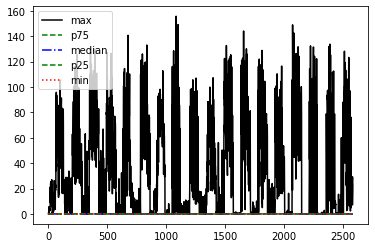

In [21]:
# Do some plotting
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(summary_stats['max'], ls='-', c='k', label='max')
plt.plot(summary_stats['Q3'], ls='--', c='g', label='p75')
plt.plot(summary_stats['median'], ls='-.', c='b', label='median')
plt.plot(summary_stats['Q1'], ls='--', c='g', label='p25')
plt.plot(summary_stats['min'], ls=':', c='r', label='min')

plt.legend()
plt.show()